# 3. Polynomail Regression

### 공부 시간에 따른 시험 점수 (우등생)

google 'polynomial regression data fit' 에서 미리 확인 가능

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/Users/jaeeunpark/Downloads/PythonMLWorkspace(LightWeight)/ScikitLearn/PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) #전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

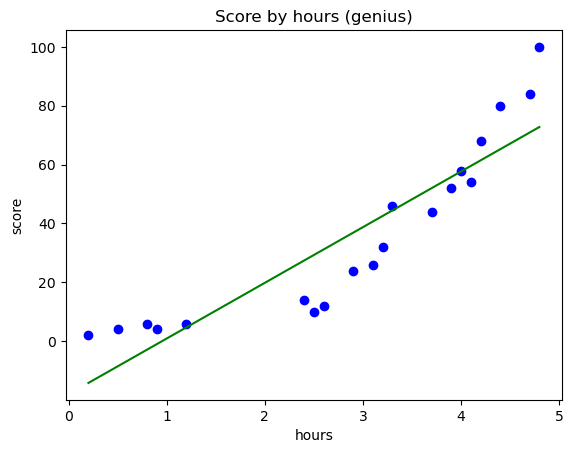

In [8]:
plt.scatter(X,y,color='blue') #산점도
plt.plot(X,reg.predict(X),color='green') #선 그래프
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #Y축 이름
plt.show()

In [9]:
reg.score(X,y) #전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #4차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] 
#[x] -> [x^0,x^1,x^2] -> x가 3이라면 [1,3,9]으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [12]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [13]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) #변환된 x와 y를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 x,y)

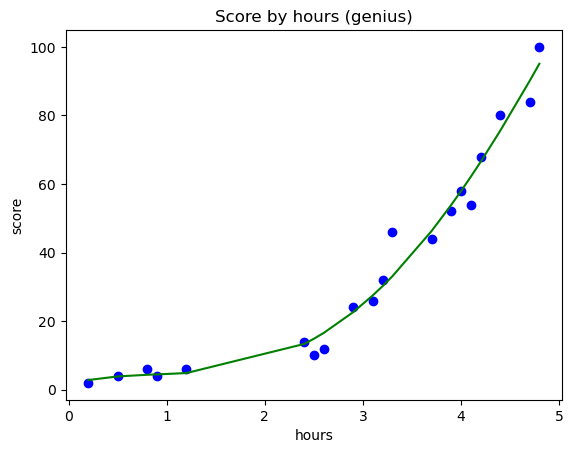

In [16]:
plt.scatter(X,y,color='b')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)),color='g')
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #Y축 이름
plt.show()

In [17]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터 생성
X_range

/var/folders/5m/5hsyskfn7xz5c5qqrqs6fnxh0000gn/T/ipykernel_34496/541574284.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터 생성


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [18]:
X_range.shape

(46,)

In [19]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [20]:
X_range = X_range.reshape(-1,1) #row: -1로 넣으면 자동으로 계산해줌, column 개수: 1개
X_range.shape

(46, 1)

In [21]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

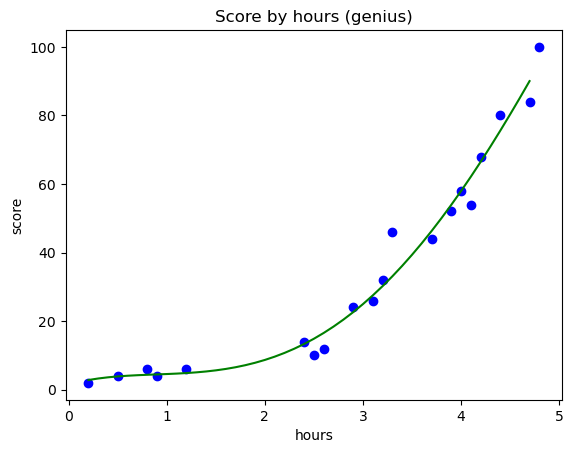

In [22]:
plt.scatter(X,y,color='b')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)),color='g')
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #Y축 이름
plt.show()

### 공부시간에 따른 시험 성적 예측

In [47]:
reg.predict([[2]]) #2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [49]:
lin_reg.predict(poly_reg.fit_transform([[2]])) #2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [51]:
lin_reg.score(X_poly, y)

0.9782775579000045